In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv(r"C:\Users\Marco\Desktop\PORTFOLIO PROJECT\Wine project\sentimentwinereview\winemag-data-130k-v2.csv")
print(df.shape)
df = df.head(500)
print(df.shape)


(129971, 14)
(500, 14)


In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


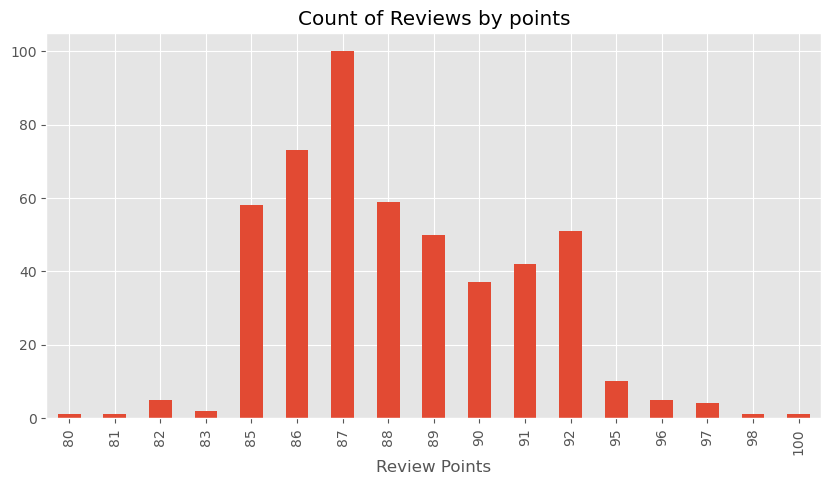

In [4]:
#Quick EDA 

ax = df['points'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by points',
          figsize=(10, 5))
ax.set_xlabel('Review Points')
plt.show()


In [5]:
#nltk
example = df['description'][50]
print(example)

This blend of Nero d'Avola and Syrah opens with savory aromas of cured meat, dried berry, cassis, tobacco and wet earth. There's a touch of almond bitterness on the finish.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]


['This',
 'blend',
 'of',
 'Nero',
 "d'Avola",
 'and',
 'Syrah',
 'opens',
 'with',
 'savory']

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'blend',
 'of',
 'Nero',
 "d'Avola",
 'and',
 'Syrah',
 'opens',
 'with',
 'savory']

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])


[('This', 'DT'), ('blend', 'NN'), ('of', 'IN'), ('Nero', 'NNP'), ("d'Avola", 'NN'), ('and', 'CC'), ('Syrah', 'NNP'), ('opens', 'VBZ'), ('with', 'IN'), ('savory', 'JJ')]


In [10]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [11]:
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  This/DT
  blend/NN
  of/IN
  (GPE Nero/NNP)
  d'Avola/NN
  and/CC
  (PERSON Syrah/NNP)
  opens/VBZ
  with/IN
  savory/JJ
  aromas/NNS
  of/IN
  cured/JJ
  meat/NN
  ,/,
  dried/VBN
  berry/NN
  ,/,
  cassis/NN
  ,/,
  tobacco/NN
  and/CC
  wet/JJ
  earth/NN
  ./.
  There/EX
  's/VBZ
  a/DT
  touch/NN
  of/IN
  almond/NN
  bitterness/NN
  on/IN
  the/DT
  finish/NN
  ./.)


In [13]:
#VADER APPROACH
#start using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sia.polarity_scores('All right Then')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'compound': -0.4019}

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    description = row['description']
    myid = row['taster_name']
    res[myid] = sia.polarity_scores(description)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
pd.DataFrame(res).T

,neg,neu,pos,compound
Kerin O’Keefe,0.000,0.838,0.162,0.8510
Roger Voss,0.000,1.000,0.000,0.0000
Paul Gregutt,0.000,0.833,0.167,0.7650
Alexander Peartree,0.000,1.000,0.000,0.0000
Michael Schachner,0.052,0.768,0.179,0.7543
Anna Lee C. Iijima,0.000,0.898,0.102,0.6124
Virginie Boone,0.000,1.000,0.000,0.0000
Matt Kettmann,0.000,0.854,0.146,0.7579
NaN,0.000,0.896,0.104,0.4215
Sean P. Sullivan,0.000,0.886,0.114,0.5574


In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'taster_name'})
vaders = vaders.merge(df, how='left')

In [20]:
# Now we have sentiment score and metadata
vaders.head()

,taster_name,neg,neu,pos,compound,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_twitter_handle,title,variety,winery
0,Kerin O’Keefe,0.0,0.838,0.162,0.851,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Kerin O’Keefe,0.0,0.838,0.162,0.851,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,Kerin O’Keefe,0.0,0.838,0.162,0.851,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,Kerin O’Keefe,0.0,0.838,0.162,0.851,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
4,Kerin O’Keefe,0.0,0.838,0.162,0.851,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì


C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


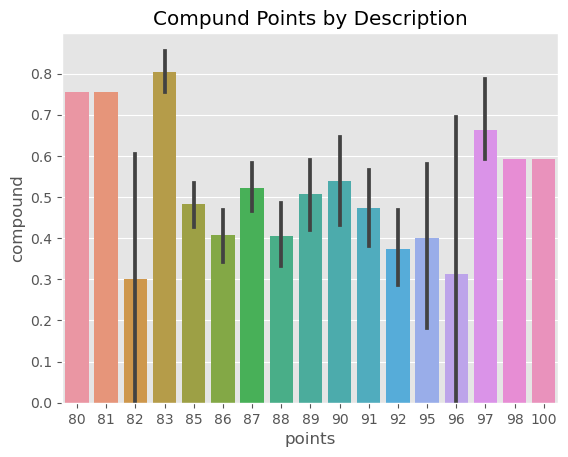

In [21]:
#Plot VADER results
ax = sns.barplot(data=vaders, x='points', y='compound')
ax.set_title('Compund Points by Description')
plt.show()

C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

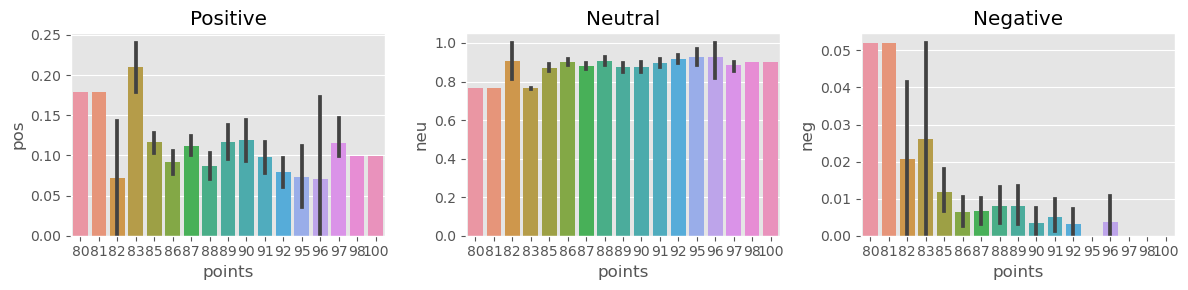

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='points', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='points', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='points', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [23]:
#Step 3. Roberta Pretrained Model
!pip install torch torchvision
!pip install tensorflow


In [24]:
from transformers import AutoTokenizer
from transformers import AutoModel, AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
#ERROR HERE @ 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\Marco\ANACONDA2023\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Marco\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [27]:
print (example)
sia.polarity_scores(example)

This blend of Nero d'Avola and Syrah opens with savory aromas of cured meat, dried berry, cassis, tobacco and wet earth. There's a touch of almond bitterness on the finish.


{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'compound': -0.4019}

In [32]:
#Run for Roberta Model 
encoded_text = tokenizer(example, return_tensors ='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]  
}
print(scores_dict)

{'roberta_neg': 0.06875314, 'roberta_neu': 0.83975935, 'roberta_pos': 0.091487505}


In [49]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors ='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]  
    }
    return scores_dict

In [71]:
# Run the polarity score on the entire dataset 
##ERROR HERE
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        description = row['description']
        myid = row['taster_name']
        vader_result_rename = {}  # Initialize the dictionary
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(description)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [72]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'taster_name'})
results_df = results_df.merge(df, how='left')

In [73]:
#Compare Scores between models
results_df.head()

,taster_name,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,country,...,designation,points,price,province,region_1,region_2,taster_twitter_handle,title,variety,winery
0,Kerin O’Keefe,0.0,0.935,0.065,0.1531,0.001631,0.053754,0.944615,0,Italy,...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Kerin O’Keefe,0.0,0.935,0.065,0.1531,0.001631,0.053754,0.944615,6,Italy,...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,Kerin O’Keefe,0.0,0.935,0.065,0.1531,0.001631,0.053754,0.944615,13,Italy,...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,Kerin O’Keefe,0.0,0.935,0.065,0.1531,0.001631,0.053754,0.944615,22,Italy,...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
4,Kerin O’Keefe,0.0,0.935,0.065,0.1531,0.001631,0.053754,0.944615,24,Italy,...,Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì


C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Marco\ANACONDA2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

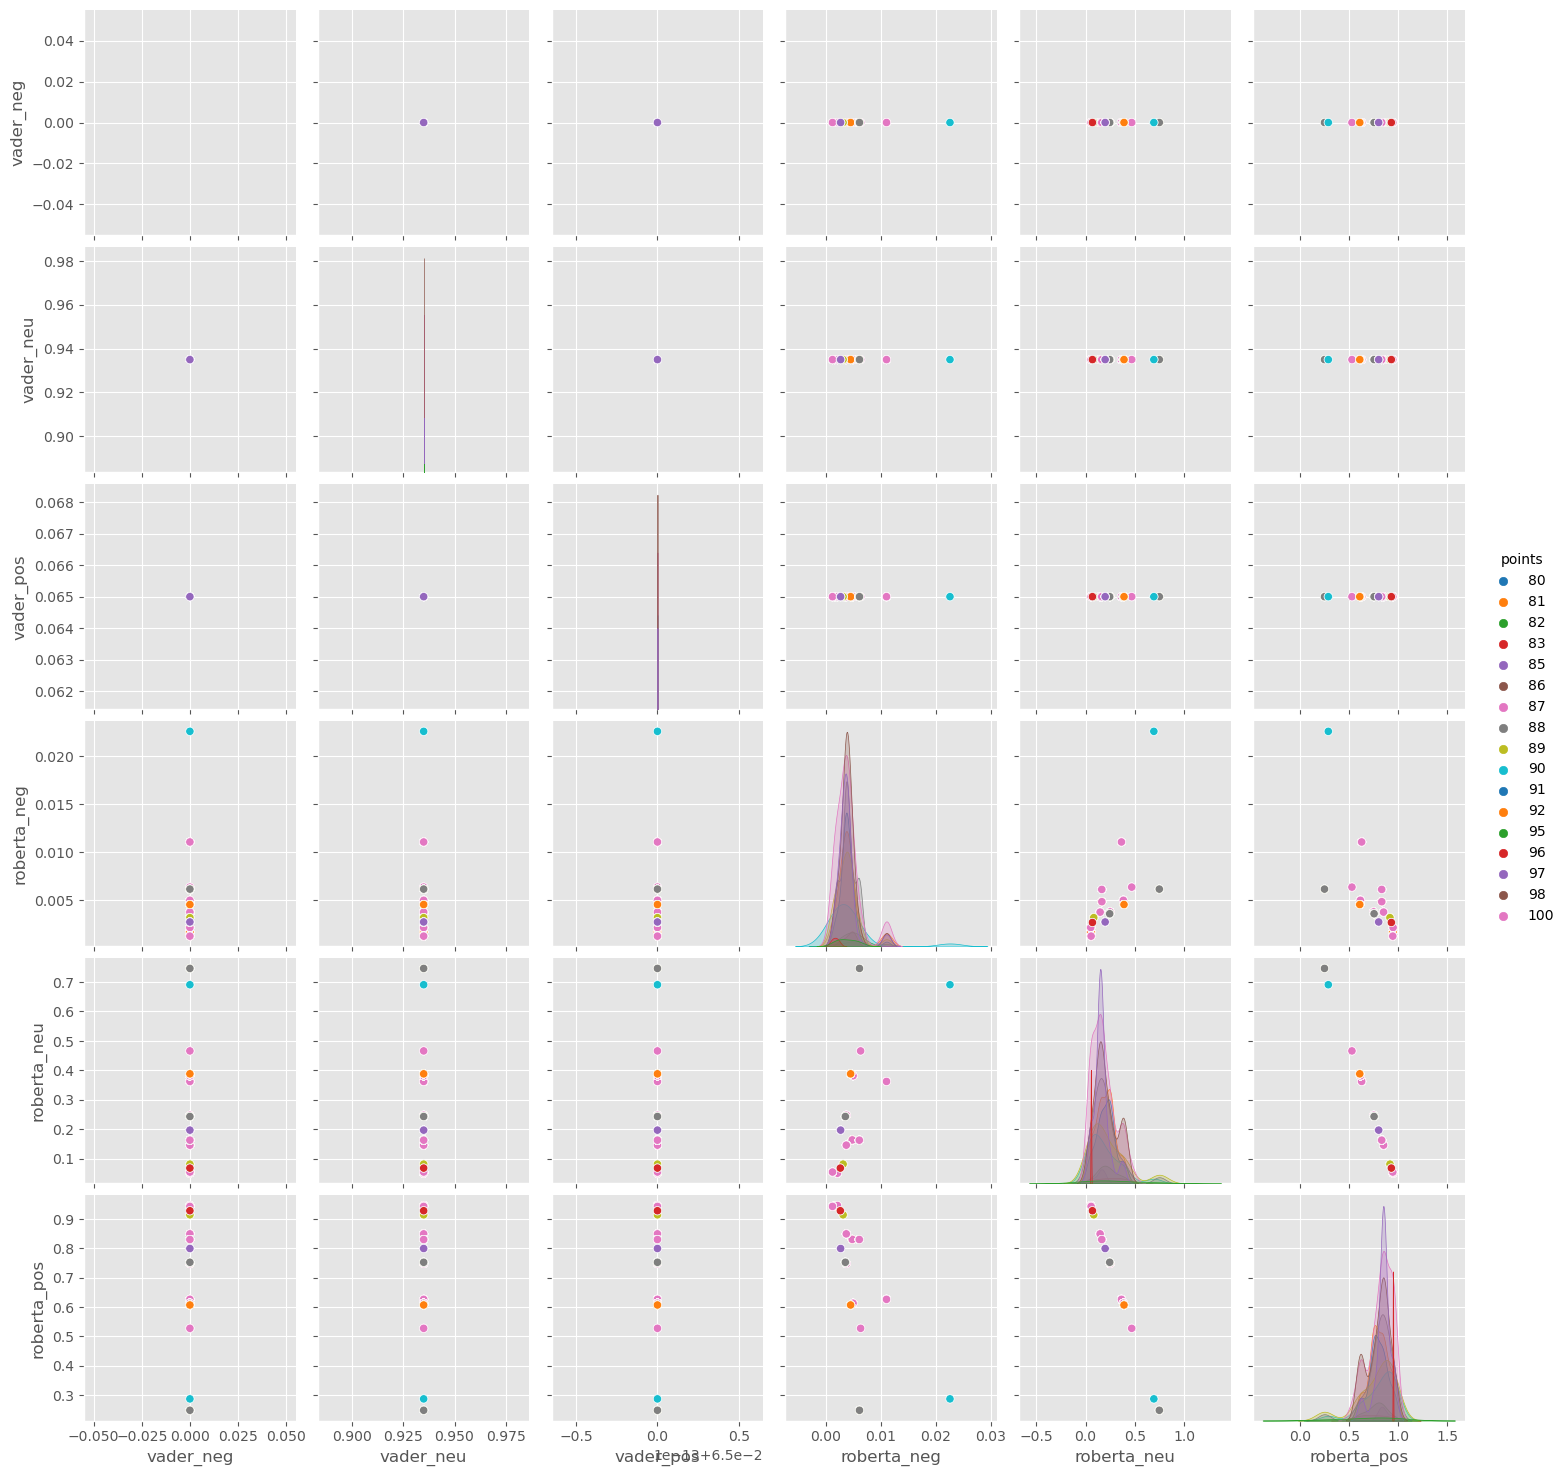

In [74]:
#Step 3. Combine and compare
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='points',
            palette='tab10')
plt.show()

In [85]:
#review examples
results_df.query('points == 85') \
    .sort_values('roberta_pos', ascending=False)['description'].values[0]

"On the plump but balanced side, with a perfumed nose that's almost sweet for SB. In the mouth, it's fairly lively and lifted, with nectarine and melon flavors that morph into pink grapefruit on the finish. Decent quality; will get the job done."

In [88]:
results_df.query('points == 85') \
    .sort_values('vader_pos', ascending=False)['description'].values[0]

'Fruity and lightly herbaceous, this has fine textured acidity along with a pink grapefruit flavor. The wine is bright and easy, and it will be ready to drink in a few months.'

In [90]:
# nevative sentiment 5-Star view
results_df.query('points == 95') \
    .sort_values('roberta_neg', ascending=False)['description'].values[0]

"For 2014, the Weber is the star of a very fine Winderlea lineup. Dark and deeply concentrated, it's jammed with black cherry fruit, annotated with anise and showing a hint of gunmetal. The tannins are ripe and taste of clean earth. This is a fine candidate for aging. Drink now through 2030."

In [91]:
results_df.query('points == 95') \
    .sort_values('vader_neg', ascending=False)['description'].values[0]

'Enticing scents of ripe berry, underbrush, grilled herb and eucalyptus mingle together along with an underlying fragrance of rose petal. Elegant and fresh, the impeccably balanced palate delivers tart red cherry, cake spice, white pepper and mineral nuances alongside polished tannins. Drink 2018–2028.'

In [92]:
#TRANSFORMER PIPELINE
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
